In [1]:
%pylab inline
from __future__ import division

from main import *

Populating the interactive namespace from numpy and matplotlib
--- 42.0150778294 seconds ---


In [2]:
# General functions #
import sys
sys.path.append('/Users/alexandre/Desktop/INRIA/Prog/Python/')

from utils import ToHtmlTableColumns, DataFrame_to_html, DataFrame_plot_pylab

In [3]:
var_to_plot = ['h_caL13', 'm_caL13', 'o_AMPA', 'd_AMPA', 'o_NMDA', 'h_CICR', 'Ca_cyt', 'Ca_ER', 'IP3', 'Dag', 'Dgl',
               'two_ag', 'AEA','fpre', 'I1P', 'PP1', 'V', 'o_CB1R', 'd_CB1R',
               'B1', 'B2','B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12','B13', 'phos_sum', 'fpost',
               'CamCa4', 'yCB1R', 'yCB1R']
y_serie_temp = y_serie[var_to_plot]

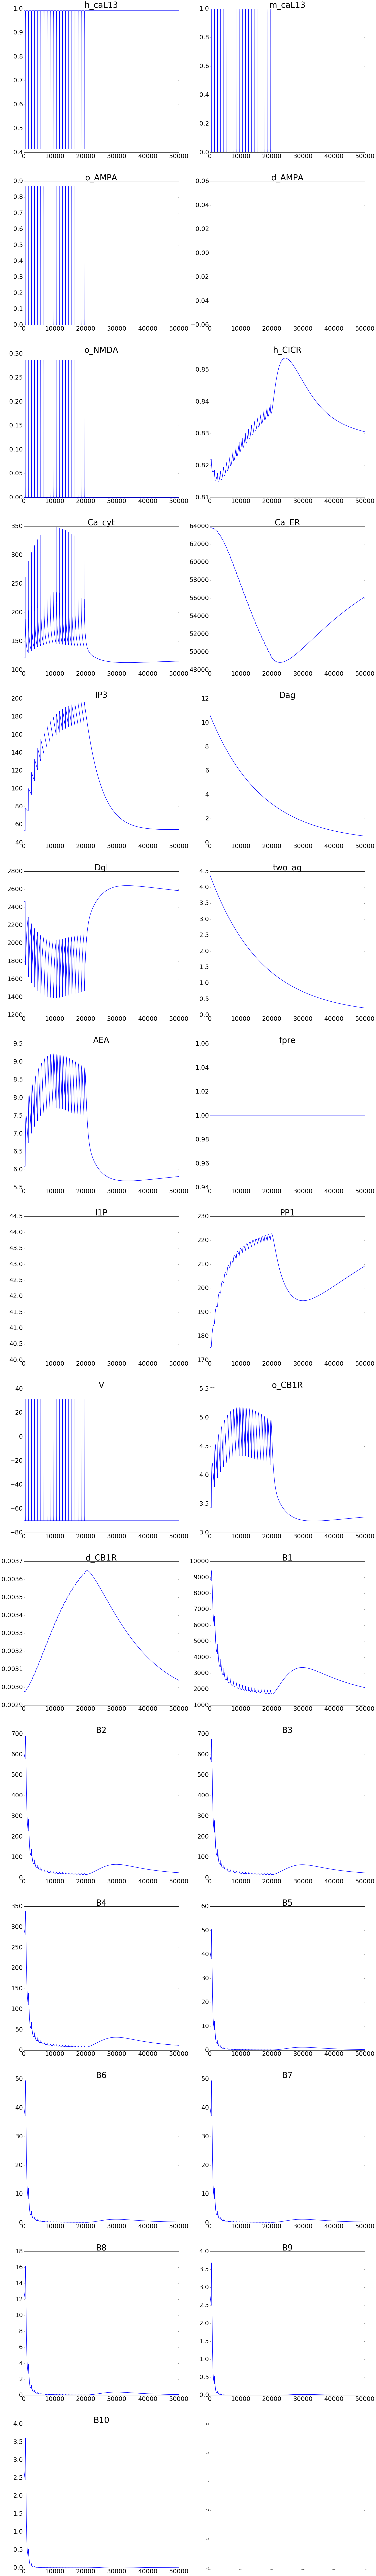

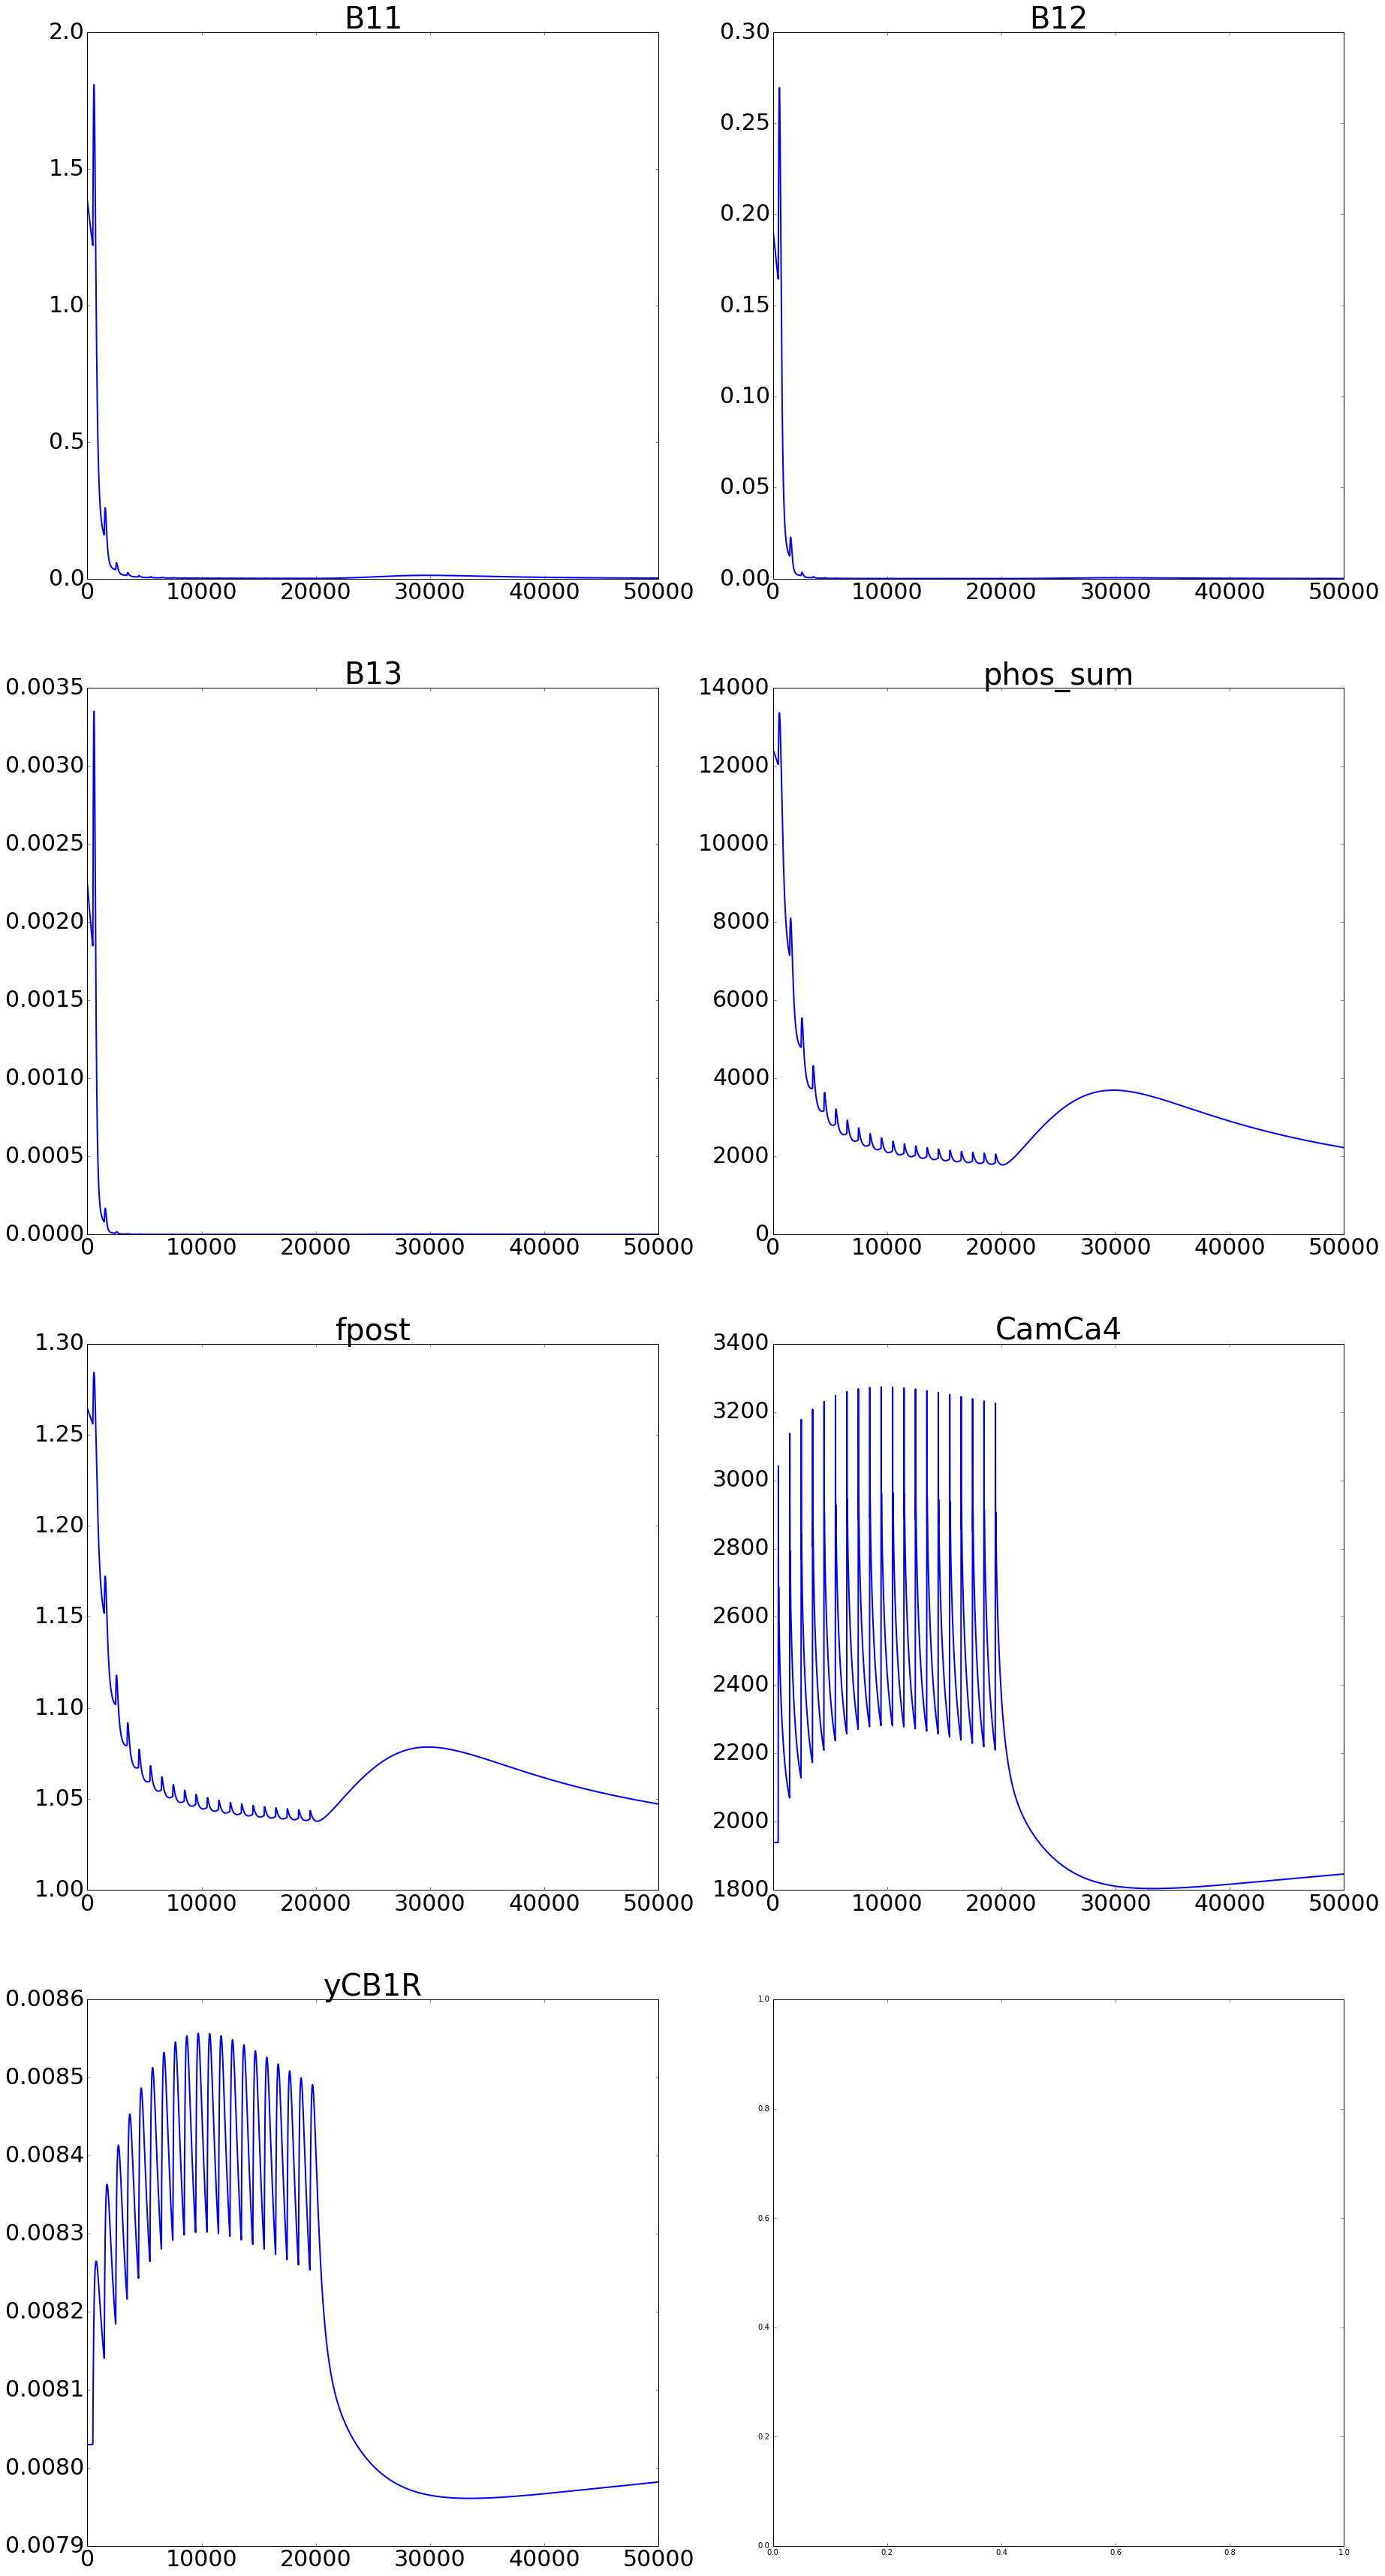

In [4]:
num_plot = 30
nb_variable = len(y_serie_temp.columns)

for i in xrange(int(nb_variable/num_plot)):
    DataFrame_plot_pylab(y_serie_temp.iloc[:,i*num_plot:(i+1)*num_plot -1], fontsize = 30)
DataFrame_plot_pylab(y_serie_temp.iloc[:,(i+1)*num_plot-1:(i+1)*num_plot-1 +nb_variable%num_plot], fontsize = 30)

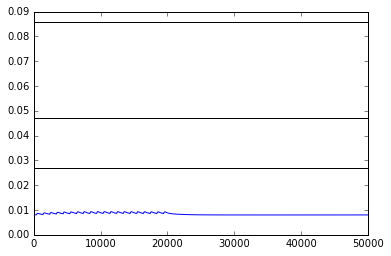

In [7]:
plt.plot(y_serie_temp['yCB1R'])
plt.hlines(params_dict['LTDstart'], y_serie_temp.index[0],y_serie_temp.index[-1])
plt.hlines(params_dict['LTDstop'], y_serie_temp.index[0],y_serie_temp.index[-1])
plt.hlines(params_dict['LTPstart'], y_serie_temp.index[0],y_serie_temp.index[-1])

In [28]:
init_dict['CamCa4']

2002.1755768629837